In [15]:
import pandas as pd
from model import Model
from xgboost import XGBRegressor
import xgboost as xgb   
from matplotlib import pyplot as plt
from wb_data_pipeline import WbDataPipeline

In [22]:
# data = pd.read_csv('no_missing.csv')
# data = data.drop('ISO_A3', axis=1)
# data = data.drop('AG.CON.FERT.PT.ZS', axis=1)
# # model = Model(model_choice='reg', est_type='xgb', tuning_strategy='bayesian')
# X_train = data.drop('Happiness score', axis=1)
# y_train = data['Happiness score']
# print(y_train)
# print(X_train.columns)
# print(y_train)
# # model.make_full_model(X_train, y_train)

# # feature_importance = model.model.feature_importances_
# # print(feature_importance)

feature_data = pd.read_csv('feature_data.csv')
no_missing = feature_data[feature_data['missing_percent'] == 0.0]
ids = no_missing['id'].tolist()
print(ids)

['AG.PRD.CROP.XD', 'AG.PRD.FOOD.XD', 'AG.PRD.LVSK.XD', 'CC.EST', 'CC.NO.SRC', 'CC.PER.RNK', 'CC.PER.RNK.LOWER', 'CC.PER.RNK.UPPER', 'CC.STD.ERR', 'EG.ELC.ACCS.UR.ZS', 'EG.ELC.ACCS.ZS', 'ER.LND.PTLD.ZS', 'ER.PTD.TOTL.ZS', 'GE.EST', 'GE.NO.SRC', 'GE.PER.RNK', 'GE.PER.RNK.LOWER', 'GE.PER.RNK.UPPER', 'GE.STD.ERR', 'IQ.SPI.PIL1', 'IQ.SPI.PIL3', 'IT.MLT.MAIN.P2', 'IT.NET.SECR', 'IT.NET.SECR.P6', 'PV.EST', 'PV.NO.SRC', 'PV.PER.RNK', 'PV.PER.RNK.LOWER', 'PV.PER.RNK.UPPER', 'PV.STD.ERR', 'RL.EST', 'RL.NO.SRC', 'RL.PER.RNK', 'RL.PER.RNK.LOWER', 'RL.PER.RNK.UPPER', 'RL.STD.ERR', 'RQ.EST', 'RQ.NO.SRC', 'RQ.PER.RNK', 'RQ.PER.RNK.LOWER', 'RQ.PER.RNK.UPPER', 'RQ.STD.ERR', 'SE.SEC.DURS', 'SH.TBS.INCD', 'SM.POP.NETM', 'SP.ADO.TFRT', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN', 'SP.DYN.TFRT.IN', 'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.POP.0004.FE.5Y', 'SP.POP.0004.MA.5Y', 'SP.POP.0014.FE.IN', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.IN', 'SP.POP.0014.

In [23]:
wdp = WbDataPipeline(ids, 2022, impute=False)

Pulling 127 indicators from World Bank data...


/home/jcdutoit/miniconda3/envs/acme/lib/python3.12/site-packages/wbgapi/data.py:343: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index_key, column_key] = np.nan if row['value'] is None else row['value']
/home/jcdutoit/miniconda3/envs/acme/lib/python3.12/site-packages/wbgapi/data.py:343: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index_key, column_key] = np.nan if row['value'] is None else row['value']
/home/jcdutoit/miniconda3/envs/acme/lib/python3.12/site-packages/wbgapi/data.py:343: PerformanceWarning: DataF

Done


/home/jcdutoit/miniconda3/envs/acme/lib/python3.12/site-packages/wbgapi/data.py:343: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index_key, column_key] = np.nan if row['value'] is None else row['value']


In [27]:
data = wdp.get_data()
data = data.dropna()
data = data.drop('ISO_A3', axis=1)
# model = Model(model_choice='reg', est_type='xgb', tuning_strategy='bayesian')
X_train = data.drop('Happiness score', axis=1)
y_train = data['Happiness score']

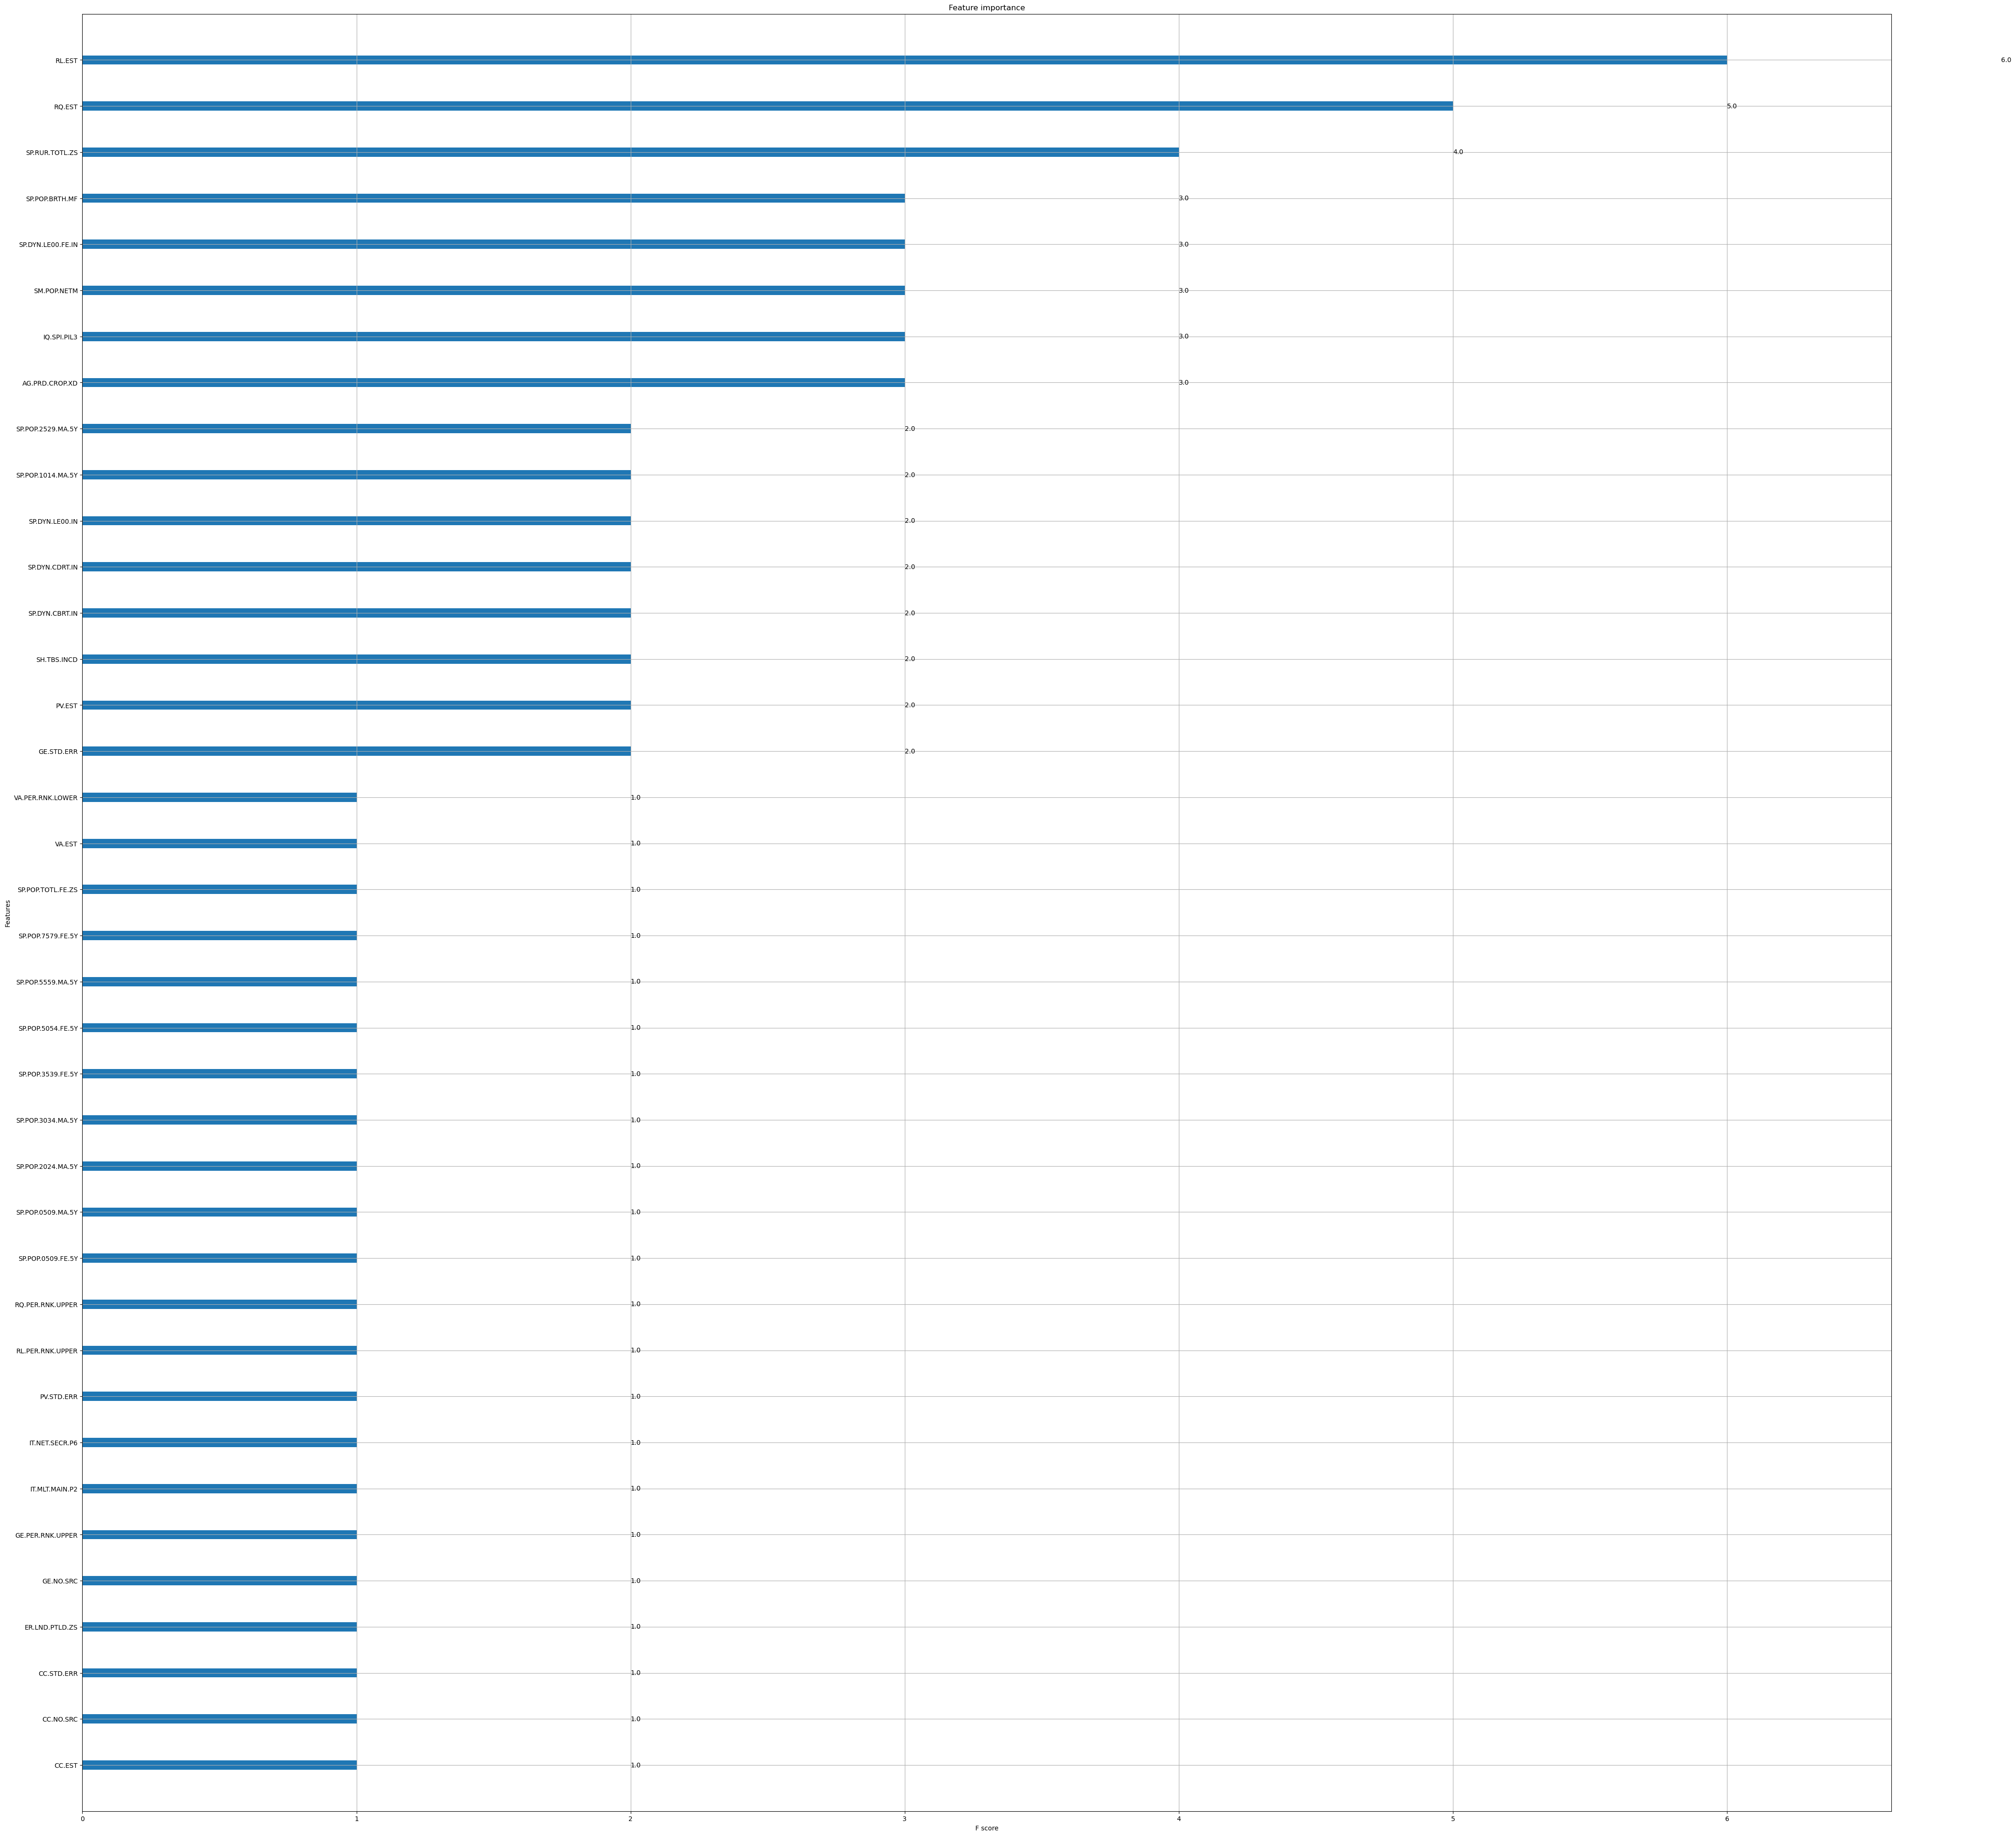

Axes(0.125,0.11;0.775x0.77)


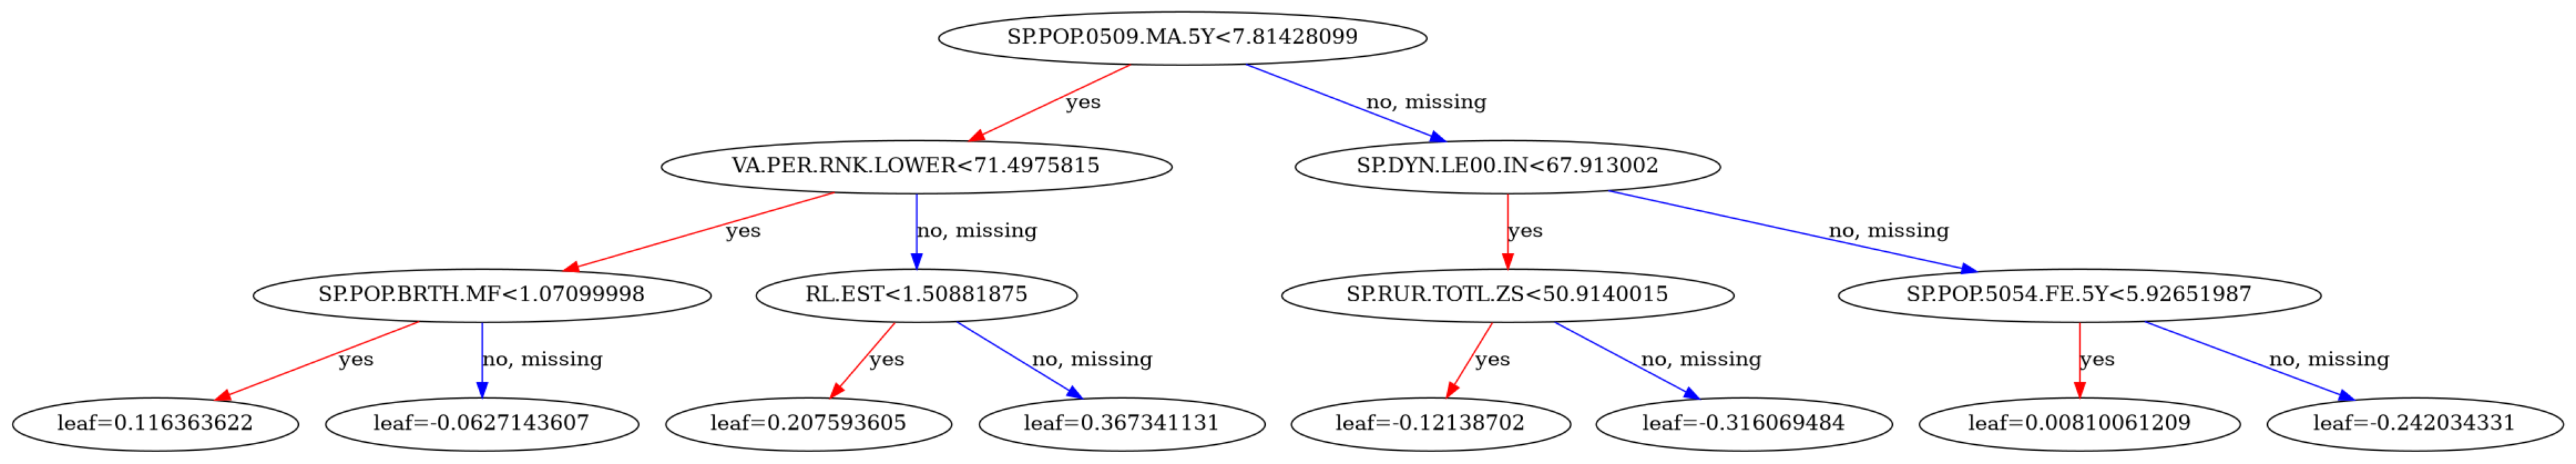

In [30]:
model = XGBRegressor(n_estimators=10, max_depth=3)
model.fit(X_train, y_train)
preds = model.predict(X_train)
# print(preds - y_train)
# print(model.feature_importances_)
# print(X_train.head())
# print(y_train.columns)
fig, ax = plt.subplots(figsize=(50, 50))
xgb.plot_importance(model, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
print(xgb.plot_tree(model, num_trees=1, ax=ax))

